# 時系列解析の基礎
## 株価

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

In [2]:
import os
import random


def reset_seed(seed=0):

    os.environ['PYTHONHASHSEED'] = '0'
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

In [3]:
# !pip install -U 'pandas_datareader'

In [4]:
from pandas_datareader.yahoo.daily import YahooDailyReader
import datetime

In [5]:
date_st = datetime.datetime(2014, 1, 1) #  (year, month, day)
date_fn = datetime.datetime(2019, 12, 19)

In [6]:
df1 = YahooDailyReader('MSFT', date_st, date_fn).read() # 証券銘柄コード。'SBI Ticker 一覧' で検索

In [7]:
df1.head()
# Adj Close = 調整後終値。実際こっちを使うことが多いらしい

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,37.400002,37.099998,37.349998,37.160000,30632200.0,32.471554
2014-01-03,37.220001,36.599998,37.200001,36.910000,31134800.0,32.253098
2014-01-06,36.889999,36.110001,36.849998,36.130001,43603700.0,31.571505
2014-01-07,36.490002,36.209999,36.330002,36.410000,35802800.0,31.816179
2014-01-08,36.139999,35.580002,36.000000,35.759998,59971700.0,31.248198


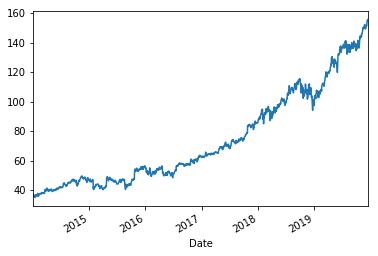

In [8]:
df1['Close'].plot()

## 複数社取得

In [9]:
symbols = ['AAPL', 'MSFT', 'GOOGL']

In [10]:
# 内包表記するための []
dfs = [YahooDailyReader(symbol, date_st, date_fn).read() 
      for symbol in symbols]

In [11]:
type(dfs)

list

In [12]:
df2 = pd.concat(dfs, axis=0, keys=symbols).unstack(0) 
# axis=1 軸の指定。0 = 行、1　= 列
# unstack(0) = 列にコード。行に Date。unstack(0) だと逆 

In [13]:
type(df2)

pandas.core.frame.DataFrame

In [14]:
df2.head()

High                               Low             \
                 AAPL       MSFT       GOOGL       AAPL       MSFT   
Date                                                                 
2014-01-02  79.575714  37.400002  559.434448  78.860001  37.099998   
2014-01-03  79.099998  37.220001  559.024048  77.204285  36.599998   
2014-01-06  78.114288  36.889999  559.989990  76.228569  36.110001   
2014-01-07  77.994286  36.490002  570.415405  76.845711  36.209999   
2014-01-08  77.937141  36.139999  574.234253  76.955711  35.580002   

                             Open                             Close  \
                 GOOGL       AAPL       MSFT       GOOGL       AAPL   
Date                                                                  
2014-01-02  554.684692  79.382858  37.349998  558.288269  79.018570   
2014-01-03  553.018005  78.980003  37.200001  558.058044  77.282860   
2014-01-06  553.773804  76.778572  36.849998  557.062073  77.704285   
2014-01-07  561.141113  77.760002  36.330002  563.063049  77.148575   
2014-01-08  567.212219  76.972855  36.000000  573.573547  77.637146   

                                        Volume                         \
                 MSFT       GOOGL         AAPL        MSFT      GOOGL   
Date                                                                    
2014-01-02  37.160000  557.117126   58671200.0  30632200.0  3639100.0   
2014-01-03  36.910000  553.053040   98116900.0  31134800.0  3330000.0   
2014-01-06  36.130001  559.219238  103152700.0  43603700.0  3535000.0   
2014-01-07  36.410000  570.000000   79302300.0  35802800.0  5100000.0   
2014-01-08  35.759998  571.186157   64632400.0  59971700.0  4480500.0   

            Adj Close                         
                 AAPL       MSFT       GOOGL  
Date                                          
2014-01-02  71.107201  32.471554  557.117126  
2014-01-03  69.545288  32.253098  553.053040  
2014-01-06  69.924515  31.571505  559.219238  
2014-01-07  69.424438  31.816179  570.000000  
2014-01-08  69.864105  31.248198  571.186157

## 時系列データのプロット

In [15]:
type(df2)

pandas.core.frame.DataFrame

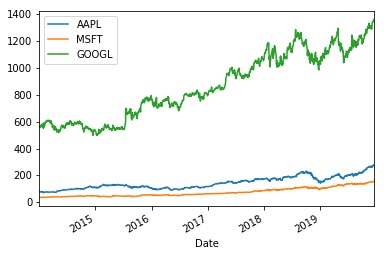

In [16]:
df2['Close'].plot()

# トレンド抽出

In [17]:
from fbprophet import Prophet # Facebook が公開しているライブラリ

In [18]:
model = Prophet() # モデルのインスタンス化

In [19]:
df1.head() # High, Low の行と、Date の行に無駄な空欄があり、修正しないとエラーが発生

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,37.400002,37.099998,37.349998,37.160000,30632200.0,32.471554
2014-01-03,37.220001,36.599998,37.200001,36.910000,31134800.0,32.253098
2014-01-06,36.889999,36.110001,36.849998,36.130001,43603700.0,31.571505
2014-01-07,36.490002,36.209999,36.330002,36.410000,35802800.0,31.816179
2014-01-08,36.139999,35.580002,36.000000,35.759998,59971700.0,31.248198


In [20]:
df1.reset_index().head() # インデックスの修正

,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-01-02,37.400002,37.099998,37.349998,37.160000,30632200.0,32.471554
1,2014-01-03,37.220001,36.599998,37.200001,36.910000,31134800.0,32.253098
2,2014-01-06,36.889999,36.110001,36.849998,36.130001,43603700.0,31.571505
3,2014-01-07,36.490002,36.209999,36.330002,36.410000,35802800.0,31.816179
4,2014-01-08,36.139999,35.580002,36.000000,35.759998,59971700.0,31.248198


In [21]:
df1.rename(columns={'Date': 'ds', 'Close': 'y'}).head() 
# rename するとまたインデックスがずれる

,High,Low,Open,y,Volume,Adj Close
Date,,,,,,
2014-01-02,37.400002,37.099998,37.349998,37.160000,30632200.0,32.471554
2014-01-03,37.220001,36.599998,37.200001,36.910000,31134800.0,32.253098
2014-01-06,36.889999,36.110001,36.849998,36.130001,43603700.0,31.571505
2014-01-07,36.490002,36.209999,36.330002,36.410000,35802800.0,31.816179
2014-01-08,36.139999,35.580002,36.000000,35.759998,59971700.0,31.248198


In [22]:
data = df1.reset_index().rename(columns={'Date': 'ds', 'Close': 'y'}).head()

In [23]:
model.fit(data) # モデルの学習

/usr/local/lib/python3.5/dist-packages/fbprophet/forecaster.py:641: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 3.0.
/usr/local/lib/python3.5/dist-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [30]:
future = model.make_future_dataframe(periods=365)

# Signature: model.make_future_dataframe(periods, freq='D', include_history=True)
# Docstring:
# Simulate the trend using the extrapolated generative model.

# Parameters
# ----------
# periods: Int number of periods to forecast forward.
# freq: Any valid frequency for pd.date_range, such as 'D' or 'M'.
# include_history: Boolean to include the historical dates in the data
#     frame for predictions.

# Returns
# -------
# pd.Dataframe that extends forward from the end of self.history for the
# requested number of periods.
# File:      /usr/local/lib/python3.5/dist-packages/fbprophet/forecaster.py
# Type:      method

In [31]:
forecast = model.predict(future) # 推論

/usr/local/lib/python3.5/dist-packages/fbprophet/forecaster.py:1010: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = seasonal_features.as_matrix()
/usr/local/lib/python3.5/dist-packages/fbprophet/forecaster.py:1134: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  seasonal = np.matmul(seasonal_features.as_matrix(), beta) * self.y_scale


In [32]:
forecast.head() # 結果の可視化

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,seasonal_lower,seasonal_upper,yhat
0,2014-01-02,37.121255,37.121255,37.121255,36.923578,37.315288,0.0,0.0,0.0,37.121255
1,2014-01-03,36.926155,36.926155,36.926155,36.731404,37.122325,0.0,0.0,0.0,36.926155
2,2014-01-06,36.340854,36.340854,36.340854,36.136834,36.544726,0.0,0.0,0.0,36.340854
3,2014-01-07,36.145753,36.145753,36.145753,35.946616,36.349993,0.0,0.0,0.0,36.145753
4,2014-01-08,35.835959,35.835959,35.835959,35.633084,36.027941,0.0,0.0,0.0,35.835959


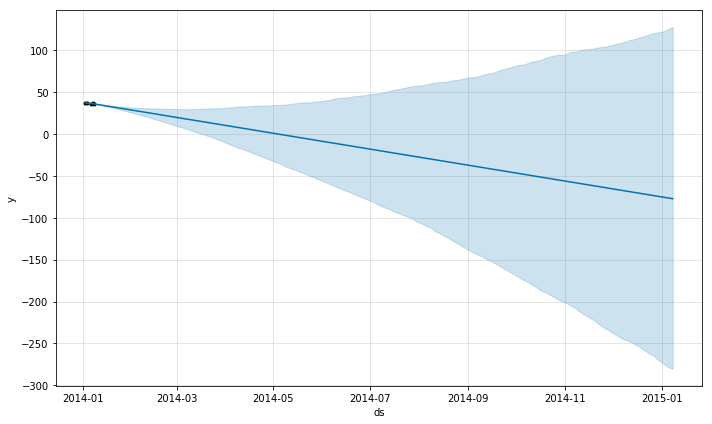

In [33]:
model.plot(forecast) # 結果のグラフ描画
plt.show()

TypeError: zip argument #1 must support iteration

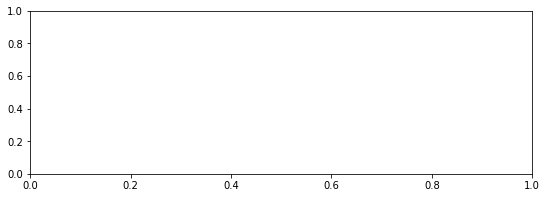

In [34]:
# トレンド抽出
model.plot_components(forecast)
plt.show()

# ---------------------------------------------------------------------------
# TypeError                                 Traceback (most recent call last)
# <ipython-input-29-152fec61156d> in <module>()
#       1 # トレンド抽出
# ----> 2 model.plot_components(forecast)
#       3 plt.show()

# /usr/local/lib/python3.5/dist-packages/fbprophet/forecaster.py in plot_components(self, fcst, uncertainty, plot_cap, weekly_start, yearly_start)
#    1304                                  figsize=(9, 3 * npanel))
#    1305 
# -> 1306         for ax, plot in zip(axes, components):
#    1307             if plot == 'trend':
#    1308                 self.plot_forecast_component(

# TypeError: zip argument #1 must support iteration
# 幅が合ってない時に出るエラーらしい